In [1]:
from tdc.single_pred import ADME
import pandas as pd


In [2]:
# Load dataset

from tdc.single_pred import ADME
data = ADME(name = 'Pgp_Broccatelli')
split = data.get_split()

Downloading...
100%|██████████| 126k/126k [00:00<00:00, 2.38MiB/s]
Loading...
Done!


In [3]:
template = """### Instructions: Answer the following question about drug properties. 
### Context: P-glycoprotein (Pgp) is an ABC transporter protein involved in intestinal absorption, drug metabolism, and brain penetration, and its 
inhibition can seriously alter a drug's bioavailability and safety. In addition, inhibitors of Pgp can be used to overcome multidrug resistance.
### Question: Given a drug SMILES string, predict the activity of Pgp inhibition.
(A) Pgp inhabition (B) Pgp is not inhabition.
SMILES: {} 
### Answer: {}"""


In [4]:
split["train"].head()

,Drug_ID,Drug,Y
0,"3,5,7-Trihydroxy-3',4',5'-trimethoxyflavone",COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)cc(OC)c1OC,1
1,"3,6,3',4'-Tetramethoxyflavone",COc1ccc2oc(-c3ccc(OC)c(OC)c3)c(OC)c(=O)c2c1,1
2,"5,6,7,3',4'-Pentamethoxyflavone",COc1ccc(-c2cc(=O)c3c(OC)c(OC)c(OC)cc3o2)cc1OC,1
3,"5,6,7,3',4',5'-Hexamethoxyflavone",COc1cc(-c2cc(=O)c3c(OC)c(OC)c(OC)cc3o2)cc(OC)c1OC,1
4,"7,3',4'-Trimethoxyflavone",COc1ccc2c(=O)cc(-c3ccc(OC)c(OC)c3)oc2c1,1


In [5]:
# process dataset

def formatting_prompts_func(examples):
    drugs = examples["Drug"]
    outputs       = examples["Y"]
    texts = []
    token_sizes = []
    for instruction, output in zip(drugs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = template.format(instruction, "(A)" if output else "(B)")
        texts.append(text)
        token_sizes.append(len(text))
    return { "text" : texts, "drugs":drugs, "outputs":outputs, "token_size":token_sizes, "ds_ident":"ADME_PAMPA_NCATS"}

def formatting_prompts_func_test(examples):
    drugs = examples["Drug"]
    outputs       = examples["Y"]
    texts = []
    token_sizes = []
    for instruction, output in zip(drugs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = template.format(instruction, "(A)" if output else "(B)")
        texts.append(text)
        token_sizes.append(len(text))
    return { "text" : texts, "drugs":drugs, "outputs":outputs, "token_size":token_sizes, "ds_ident":"ADME_PAMPA_NCATS"}

In [6]:
train_dataset = formatting_prompts_func(split["train"])
valid_dataset = formatting_prompts_func_test(split["valid"])
test_dataset = formatting_prompts_func_test(split["test"])

<Axes: >

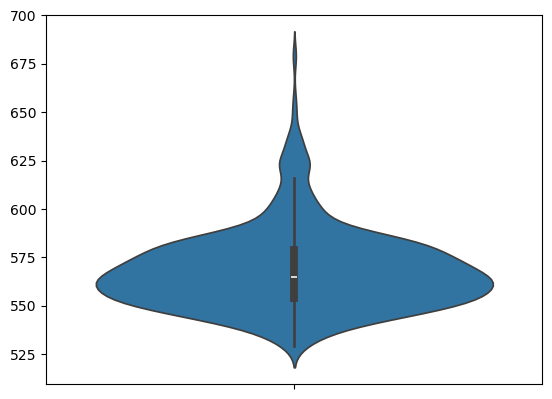

In [7]:
import seaborn as sns

sns.violinplot(train_dataset["token_size"])

In [8]:
len(train_dataset["text"]), len(valid_dataset["text"]), len(test_dataset["text"])

(852, 122, 244)

In [9]:
import pickle
import os


def dump_file(obj, path, file_name):
    os.makedirs(path, exist_ok=True)
    file_name = os.path.join(path,file_name)
    with open(file_name, "wb") as f0:
        pickle.dump(obj,f0)

In [10]:
dump_file(train_dataset, "processed", "train.pkl")
dump_file(valid_dataset, "processed", "valid.pkl")
dump_file(test_dataset, "processed", "test.pkl")